#1. Read the data for Amazon and Google

In [ ]:
import pandas as pd
import numpy as np

am_goo_train_df = pd.read_csv("/content/drive/MyDrive/ML/data/amazon_google/gs_train.csv")
am_goo_train_recs = am_goo_train_df.to_dict('records')

am_goo_val_df = pd.read_csv("/content/drive/MyDrive/ML/data/amazon_google/gs_val.csv")
am_goo_val_recs = am_goo_val_df.to_dict('records')

am_goo_test_df = pd.read_csv("/content/drive/MyDrive/ML/data/amazon_google/gs_test.csv")
am_goo_test_recs = am_goo_test_df.to_dict('records')

amazon_df = pd.read_csv("/content/drive/MyDrive/ML/data/amazon_google/1_amazon.csv",  encoding = "ISO-8859-1")
amazon_recs = amazon_df.to_dict('records')

google_df = pd.read_csv("/content/drive/MyDrive/ML/data/amazon_google/2_google.csv",  encoding = "ISO-8859-1")
google_recs = google_df.to_dict('records')

amazon_id_to_rec_map = {a['subject_id']: a for a in amazon_recs}
google_id_to_rec_map = {b['subject_id']: b for b in google_recs}

len(am_goo_train_recs), len(am_goo_val_recs), len(am_goo_test_recs), len(amazon_recs), len(google_recs)

(5908, 1696, 836, 1113, 1291)

###1.1 Data exploration

In [ ]:
am_goo_train_df.head()

,source_id,target_id,matching
0,b0001wn1ee,http://www.google.com/base/feeds/snippets/9255...,False
1,b000g80lku,http://www.google.com/base/feeds/snippets/1531...,False
2,b000070ilx,http://www.google.com/base/feeds/snippets/1575...,False
3,b000ub6avc,http://www.google.com/base/feeds/snippets/9526...,False
4,b000cc22ys,http://www.google.com/base/feeds/snippets/1024...,False


Positive to all ratio for train, val and test:

In [ ]:
train_pos = len([a for a in am_goo_train_recs if a['matching']])
val_pos = len([a for a in am_goo_val_recs if a['matching']])
test_pos = len([a for a in am_goo_test_recs if a['matching']])
train_pos, train_pos/len(am_goo_train_recs), val_pos, val_pos/len(am_goo_val_recs), test_pos, test_pos/len(am_goo_test_recs)

(909, 0.1538591740013541, 261, 0.15389150943396226, 128, 0.15311004784688995)

In [ ]:
#price
len(amazon_df[amazon_df['price'] == 0.0 ]) / len(amazon_df), len(google_df[google_df['price'] == 0.0]) / len(google_df) 

(0.11320754716981132, 0.0)

11% amazon records and 0% google recs lack price info

In [ ]:
#description
len(amazon_df[amazon_df['description'].isnull()]) / len(amazon_df), \
(len(google_df[google_df['description'].isnull()]) + len(google_df[google_df['description'] == 'no description available'])) / len(google_df)

(0.08715184186882301, 0.03640588690937258)

8% of amazon records and 3.6% of google records dont have description

In [ ]:
#manufacturer
len(amazon_df[amazon_df['manufacturer'].isnull()]) / len(amazon_df), \
(len(google_df[google_df['manufacturer'].isnull()])) / len(google_df) 

(0.0, 0.9147947327652982)

No amazon records lack manufactuer and 91% google recs don't have manufacturer info

In [ ]:
amazon_df.head(10)

,subject_id,name,description,manufacturer,price
0,b000jz4hqo,clickart 950 000 - premier image pack (dvd-rom),NaN,broderbund,0.00
1,b00004tkvy,noah's ark activity center (jewel case ages 3-8),NaN,victory multimedia,0.00
2,b000g80lqo,peachtree by sage premium accounting for nonpr...,peachtree premium accounting for nonprofits 20...,sage software,599.99
3,b0006se5bq,singing coach unlimited,singing coach unlimited - electronic learning ...,carry-a-tune technologies,99.99
4,b00021xhzw,adobe after effects professional 6.5 upgrade f...,upgrade only; installation of after effects st...,adobe,499.99
5,b0000dbykm,mia's math adventure: just in time,in mia's math adventure: just in time children...,kutoka,19.99
6,b00029bqa2,disney's 1st & 2nd grade bundle (pixar 1st gra...,disney's 1st & 2nd grade bundle will help your...,disney,14.99
7,b0007prnjo,paper art: gift wrapping,how many times have you heard that it's the th...,arc media inc.,0.00
8,b000i82j80,spy sweeper spanish,NaN,webroot software,29.95
9,b000in6u62,omnioutliner professional 3.0,NaN,csdc,69.95


In [ ]:
google_df.head(10)

,subject_id,name,description,manufacturer,price
0,http://www.google.com/base/feeds/snippets/1112...,learning quickbooks 2007,learning quickbooks 2007,intuit,38.99
1,http://www.google.com/base/feeds/snippets/1134...,qb pos 6.0 basic software,qb pos 6.0 basic retail mngmt software. for re...,intuit,637.99
2,http://www.google.com/base/feeds/snippets/1224...,production prem cs3 mac upgrad,adobe cs3 production premium mac upgrade from ...,adobe software,805.99
3,http://www.google.com/base/feeds/snippets/1231...,video studio 11 plus,corel video studio 11 plus is consumer video e...,corel corporation,103.99
4,http://www.google.com/base/feeds/snippets/1283...,qb pos 6.0 pro multi store sw,qb pos 6.0 pro multistore retail mngmt softwar...,intuit,1054.99
5,http://www.google.com/base/feeds/snippets/1294...,qb credit card kit 3.0,quickbooks credit card kit v3.0 (2007),intuit,25.99
6,http://www.google.com/base/feeds/snippets/1299...,vegas movie studiodvd+8 plat,sony media software vegas movie studio +dvd 8 ...,sony creative software,92.99
7,http://www.google.com/base/feeds/snippets/1339...,qb pos 6.0 pro solution hw/sw,qb pos 6.0 pro solution hw/sw. ships in an unp...,intuit,1474.99
8,http://www.google.com/base/feeds/snippets/1056...,evergirl: pc cd-rom video game,based on the tween lifestyle brand launched in...,NaN,14.99
9,http://www.google.com/base/feeds/snippets/1355...,902453-007-b rumba unix-hp edition - upgrade l...,netmanage 902453-007-b : usually ships in 24 h...,NaN,147.73


#2. Data Augmentation (used in 3.3)

In [ ]:
!pip install nlpaug transformers

In [ ]:
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.char as nac
import random

aug_arr = []
aug_arr.append(naw.ContextualWordEmbsAug(aug_p = 0.1, action='substitute', top_k = 5, aug_min=0, aug_max = 3, stopwords=['name', 'product', 'description', 'price']))
aug_arr.append(naw.RandomWordAug(aug_p = 0.1, action='crop', aug_min=0, aug_max = 3))
aug_arr.append(naw.RandomWordAug(aug_p = 0.1, action='swap', aug_min=0, aug_max = 5, stopwords=['name', 'product', 'description', 'price']))
aug_arr.append(naw.RandomWordAug(aug_p = 0.1, action='delete', aug_min=0, aug_max = 4,  stopwords=['name', 'product', 'description', 'price']))
aug_arr.append( nac.RandomCharAug(aug_char_p=0.1, action='swap', aug_char_min =0, aug_char_max=3, include_numeric=False))
aug_arr.append(nac.RandomCharAug(aug_char_p=0.1, action='delete', aug_char_min =0, aug_char_max=4))
aug_arr.append(nac.RandomCharAug(aug_char_p=0.1, action='insert', aug_char_min =0, aug_char_max=4, include_numeric=False))
aug_arr.append(nac.RandomCharAug(aug_char_p=0.1, action='substitute', aug_char_min =0, aug_char_max=4, include_numeric=False))

pairs_pos_train = [(get_description(amazon_id_to_rec_map[ab["source_id"]]), get_description(google_id_to_rec_map[ab["target_id"]])) for ab in am_goo_train_recs + am_goo_val_recs if ab['matching']]
pairs_neg_train = [(get_description(amazon_id_to_rec_map[ab["source_id"]]), get_description(google_id_to_rec_map[ab["target_id"]])) for ab in am_goo_train_recs + am_goo_val_recs if not ab['matching']]

np.random.seed(42)


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
def augment(d, col, aug_arr):
   # choose if this sample is going to be augmented - let's augment with prob 50%
   if np.random.rand() >= 0.5:
    ind = int(np.round(np.random.rand() * (len(aug_arr) - 1)))
    aug_sample = aug_arr[ind].augment(d[col])[0]
    return aug_sample
   return False

def augment_dataset(data):
  augmented_pos_train_data = []

  for d in data:
    d0 = False
    d1 = False

    augmented_pos_train_data.append(d)
    
    d0 = augment(d, 0, aug_arr)
    d1 = augment(d, 1, aug_arr)
    if not d0 and not d1:
      continue

    if d0 and d1:
      augmented_pos_train_data.append((d0, d1))
    else:
      if d0:
        d1 = d[1]
      else:
        d0 = d[0]
  
      augmented_pos_train_data.append((d0, d1))

  return augmented_pos_train_data

data_pos = augment_dataset(pairs_pos_train)
data_neg = augment_dataset(pairs_neg_train)

len(pairs_pos_train), len(data_pos), len(pairs_neg_train), len(data_neg)

(1170, 2055, 6434, 11275)

In [ ]:
data_pos[:2]

[('The name of the product is topics entertainment math success deluxe 2006. Description: nan. The price is 49.99.',
  'The name of the product is nan math success deluxe 2006. Description: covers 13 subjects and includes 8 cd-roms ages 10 & up grades 4-12 includes addition subtraction multiplication division and forty-nine pre-algebra topics including fractions and decimals ratios and proportions radicals the metric system and .... The price is 12.9.'),
 ('The name of the product is topics entertainment math success deluxe 2006. Description: nan. The price is 49.99.',
  'The name of the product is nan math sccess deluxe 200. Description: covers 13 ubjects and include 8 cd - roms ages 10 & up grdes 4 - 12 icludes addition subtraction multiplication division and forty - nine pre - algebra opics including fraction and ecimals ratios and proportions radicals the metric system and. .. . The pice is 12. 9.')]

In [ ]:
description_pos = data_pos
description_neg = data_neg

#3. Apply Sentence-Transformers embeddings + ScaNN Search

In [ ]:
!pip install sentence_transformers scann

In [ ]:
def get_description(rec):
  description = f" Description: {rec['description']}." if rec['description'] and rec['description'] != 'no description available' else ''
  name = rec['name']

  if rec['manufacturer']:
    name = rec['name'] if str(rec['manufacturer']) in rec['name'] else f"{rec['manufacturer']} {rec['name']}"
 
  price = 'unknown' if np.isnan(rec['price']) or rec['price'] == 0.0 else rec['price']

  return f"""The name of the product is {name}.{description} The price is {price}."""

In [ ]:
get_description(amazon_recs[0])

'The name of the product is Sony Turntable - PSLX350H. Description: Sony Turntable - PSLX350H/ Belt Drive System/ 33-1/3 and 45 RPM Speeds/ Servo Speed Control/ Supplied Moving Magnet Phono Cartridge/ Bonded Diamond Stylus/ Static Balance Tonearm/ Pitch Control. The price is unknown.'

In [ ]:
get_description(google_recs[10]), google_recs[10]

('The name of the product is channel sources distribution co mlw6.0 checkmark multiledger for pc/mac. The price is 294.58.',
 {'subject_id': 'http://www.google.com/base/feeds/snippets/11635339528486156141',
  'name': 'channel sources distribution co mlw6.0 checkmark multiledger for pc/mac',
  'description': 'no description available',
  'manufacturer': 'channel sources distribution co',
  'price': 294.58})

In [ ]:
%%time
import scann
import numpy as np

def run_embedding_and_search(model, candidates_len=10, db_embeddings = None, q_embeddings = None):

  # Embded all abt records
  if not db_embeddings:
    amazon_descriptions = [get_description(abt) for abt in amazon_recs]
    amazon_embeddings = [model.encode(abt) for abt in amazon_descriptions]
  else:
    amazon_embeddings = db_embeddings
  amazon_embeddings_np = np.stack(amazon_embeddings, axis = 0)
  amazon_embeddings_norm = amazon_embeddings_np / np.linalg.norm(amazon_embeddings_np, axis=1)[:, np.newaxis]

  # Embded test buy records
  if not q_embeddings:
    google_test_recs = [ google_id_to_rec_map[a['target_id']] for a in am_goo_test_recs]
    google_test_descriptions = [get_description(buy) for buy in google_test_recs]
    google_embeddings = [model.encode(b) for b in google_test_descriptions]
  else:
    google_embeddings = q_embeddings

  #init scaNN and run search
  engine = scann.scann_ops_pybind.builder(amazon_embeddings_norm, candidates_len, "dot_product").tree(
    num_leaves=200, num_leaves_to_search=50, training_sample_size=250000).score_ah(
    2, anisotropic_quantization_threshold=0.2).reorder(50).build()

  query_embeddings_np = np.stack(google_embeddings, axis = 0)
  neighbors, distances = engine.search_batched_parallel(query_embeddings_np, leaves_to_search=200, pre_reorder_num_neighbors=50)

  return neighbors, distances, amazon_embeddings, google_embeddings


CPU times: user 16 µs, sys: 0 ns, total: 16 µs
Wall time: 20 µs


In [ ]:
# Get predictions for top k = 10 candidates
def get_predictions_for_top_ks(k=10):

  predictions = [{} for i in range(len(neighbors))]
  top_ks = [i for i in range(1, k + 1)]
  for top_k in top_ks:
    for i, neighbor in enumerate(neighbors):
      p = am_goo_test_recs[i]['source_id'] in [amazon_recs[idx]['subject_id'] for idx in neighbor][:top_k]
      predictions[i][str(top_k)] = p

  return predictions

from sklearn import metrics

def get_metrics(predictions, k=10):
  top_ks = [i for i in range(1, k + 1)]

  y_true = [a['matching'] for a in am_goo_test_recs]
  results = []
  for top_k in top_ks:
    y_pred = [a[str(top_k)] for a in predictions]
    rep = metrics.classification_report(y_true, y_pred, output_dict=True)
    results.append(rep)
  return results



##3.1. Baseline model (all-mpnet-base-v2)

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

In [ ]:
neighbors, distances, amazon_embeddings, google_embeddings = run_embedding_and_search(model, candidates_len=10)

len(google_embeddings), len(amazon_embeddings)

In [ ]:
len(neighbors), len(distances)

(710, 710)

In [ ]:
predictions = get_predictions_for_top_ks()
metrics_base = get_metrics(predictions)

For base pre-trained emebeddings recall@1 is just 60%.

In [ ]:
metrics_base

[{'False': {'precision': 0.9314516129032258,
   'recall': 0.9788135593220338,
   'f1-score': 0.9545454545454545,
   'support': 708},
  'True': {'precision': 0.8369565217391305,
   'recall': 0.6015625,
   'f1-score': 0.7000000000000001,
   'support': 128},
  'accuracy': 0.9210526315789473,
  'macro avg': {'precision': 0.8842040673211782,
   'recall': 0.7901880296610169,
   'f1-score': 0.8272727272727273,
   'support': 836},
  'weighted avg': {'precision': 0.9169834649737949,
   'recall': 0.9210526315789473,
   'f1-score': 0.9155719878207916,
   'support': 836}},
 {'False': {'precision': 0.9590973201692524,
   'recall': 0.96045197740113,
   'f1-score': 0.959774170783345,
   'support': 708},
  'True': {'precision': 0.7795275590551181,
   'recall': 0.7734375,
   'f1-score': 0.776470588235294,
   'support': 128},
  'accuracy': 0.9318181818181818,
  'macro avg': {'precision': 0.8693124396121852,
   'recall': 0.866944738700565,
   'f1-score': 0.8681223795093196,
   'support': 836},
  'weighte

### Error analysis

In [ ]:
k = 1
wrongs_true1 = []
for i, p in enumerate(predictions):
  if abt_buy_test_recs[i]['matching'] and not p[str(k)]:
    wrongs_true1.append((i, buy_test_recs[i], abt_id_to_rec_map[abt_buy_test_recs[i]['source_id']], abt_recs[neighbors[i][0]])) #take first prediction
len(wrongs_true1), wrongs_true1[:5]

(35,
 [(2,
   {'subject_id': 207390682,
    'name': 'Sony LCS-X20 Camcorder Case - LCSX20',
    'description': 'Nylon, Polyamide - Black',
    'manufacturer': 'Sony',
    'price': nan},
   {'subject_id': 34036,
    'name': 'Sony Black Handycam Camcorder Soft Carrying Case - LCSX20',
    'description': 'Sony Black Handycam Camcorder Soft Carrying Case - LCSX20/ Compatible To Hard Drive And DVD Camcorders/ Stain Resistant Nylon/ Organizer For Accessories/ Shoulder Held Case',
    'price': nan},
   {'subject_id': 34150,
    'name': 'Sony Soft Camera Carrying Case - LCSMX100',
    'description': 'Sony Soft Camera Carrying Case - LCSMX100/ Stain Resistant Nylon/ Colored Interior/ Movable Partition/ Build-In Modular Interface/ Black Finish',
    'price': nan}),
  (12,
   {'subject_id': 90138537,
    'name': 'Panasonic KX-TSC14B Corded Telephone',
    'description': '2 x Phone Line(s) - Headset - Black',
    'manufacturer': 'Panasonic',
    'price': nan},
   {'subject_id': 30590,
    'name': 

Pretrained Sentence transformed is not sensitive to exact model names, like KXTSC14B but rather just to general descriptions being similar. 

##3.2 Fine-tune Sentence transformers on train + val pairs

### Multiple Negative Ranking Loss

In [ ]:
pairs_pos_train = [(amazon_id_to_rec_map[ab["source_id"]], google_id_to_rec_map[ab["target_id"]]) for ab in am_goo_train_recs + am_goo_val_recs if ab['matching']]
pairs_neg_train = [(amazon_id_to_rec_map[ab["source_id"]], google_id_to_rec_map[ab["target_id"]]) for ab in am_goo_train_recs + am_goo_val_recs if not ab['matching']]

description_pos = [(get_description(a), get_description(b)) for a, b in pairs_pos_train]
description_neg = [(get_description(a), get_description(b)) for a, b in pairs_neg_train]

In [ ]:
description_pos[1], len(description_pos)

(('The name of the product is topics entertainment math success deluxe 2006. Description: nan. The price is 49.99.',
  'The name of the product is nan math sccess deluxe 200. Description: covers 13 ubjects and include 8 cd - roms ages 10 & up grdes 4 - 12 icludes addition subtraction multiplication division and forty - nine pre - algebra opics including fraction and ecimals ratios and proportions radicals the metric system and. .. . The pice is 12. 9.'),
 2055)

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

In [ ]:
from sentence_transformers import SentenceTransformer, losses, InputExample
from torch.utils.data import DataLoader

train_examples = [InputExample(texts=d) for d in description_pos]
train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=16)
train_loss = losses.MultipleNegativesRankingLoss(model=model)

In [ ]:
len(train_examples)

2055

In [ ]:
model.fit(train_objectives=[(train_dataloader, train_loss)], epochs=20) 

In [ ]:
%%time
neighbors, distances, amazon_embeddings, google_embeddings = run_embedding_and_search(model, candidates_len=10)

len(google_embeddings), len(amazon_embeddings)

CPU times: user 1.74 s, sys: 75.5 ms, total: 1.81 s
Wall time: 1.22 s


(836, 1113)

Predict matchings:

In [ ]:
predictions = get_predictions_for_top_ks()
metrics_mnrl = get_metrics(predictions)

Fine-tuning the embeddings increased recall@1 by 30%!

In [ ]:
metrics_mnrl

[{'False': {'precision': 0.9846368715083799,
   'recall': 0.9957627118644068,
   'f1-score': 0.9901685393258426,
   'support': 708},
  'True': {'precision': 0.975,
   'recall': 0.9140625,
   'f1-score': 0.9435483870967741,
   'support': 128},
  'accuracy': 0.9832535885167464,
  'macro avg': {'precision': 0.9798184357541899,
   'recall': 0.9549126059322034,
   'f1-score': 0.9668584632113084,
   'support': 836},
  'weighted avg': {'precision': 0.9831613696506374,
   'recall': 0.9832535885167464,
   'f1-score': 0.9830305255874207,
   'support': 836}},
 {'False': {'precision': 0.9985074626865672,
   'recall': 0.9449152542372882,
   'f1-score': 0.9709724238026125,
   'support': 708},
  'True': {'precision': 0.7650602409638554,
   'recall': 0.9921875,
   'f1-score': 0.8639455782312925,
   'support': 128},
  'accuracy': 0.9521531100478469,
  'macro avg': {'precision': 0.8817838518252112,
   'recall': 0.968551377118644,
   'f1-score': 0.9174590010169525,
   'support': 836},
  'weighted avg': {

##3.3 Fine-tune Sentence transformers on *augmented* train + val pairs

In [ ]:
neighbors, distances, amazon_embeddings, google_embeddings = run_embedding_and_search(model, candidates_len=10)

len(google_embeddings), len(amazon_embeddings)

(836, 1113)

Augmenting the train dataset increased reacall@1 by 2%:

In [ ]:
predictions = get_predictions_for_top_ks()
metrics_mnrl_aug = get_metrics(predictions)
metrics_mnrl_aug

[{'False': {'precision': 0.9887323943661972,
   'recall': 0.9915254237288136,
   'f1-score': 0.9901269393511989,
   'support': 708},
  'True': {'precision': 0.9523809523809523,
   'recall': 0.9375,
   'f1-score': 0.9448818897637795,
   'support': 128},
  'accuracy': 0.9832535885167464,
  'macro avg': {'precision': 0.9705566733735748,
   'recall': 0.9645127118644068,
   'f1-score': 0.9675044145574891,
   'support': 836},
  'weighted avg': {'precision': 0.983166623344533,
   'recall': 0.9832535885167464,
   'f1-score': 0.9831994676440342,
   'support': 836}},
 {'False': {'precision': 0.9985029940119761,
   'recall': 0.942090395480226,
   'f1-score': 0.9694767441860466,
   'support': 708},
  'True': {'precision': 0.7559523809523809,
   'recall': 0.9921875,
   'f1-score': 0.8581081081081081,
   'support': 128},
  'accuracy': 0.9497607655502392,
  'macro avg': {'precision': 0.8772276874821785,
   'recall': 0.967138947740113,
   'f1-score': 0.9137924261470773,
   'support': 836},
  'weighted

# Plot models

In [ ]:
metrics_tuned = [{'False': {'precision': 0.9846368715083799,
   'recall': 0.9957627118644068,
   'f1-score': 0.9901685393258426,
   'support': 708},
  'True': {'precision': 0.975,
   'recall': 0.9140625,
   'f1-score': 0.9435483870967741,
   'support': 128},
  'accuracy': 0.9832535885167464,
  'macro avg': {'precision': 0.9798184357541899,
   'recall': 0.9549126059322034,
   'f1-score': 0.9668584632113084,
   'support': 836},
  'weighted avg': {'precision': 0.9831613696506374,
   'recall': 0.9832535885167464,
   'f1-score': 0.9830305255874207,
   'support': 836}},
 {'False': {'precision': 0.9985074626865672,
   'recall': 0.9449152542372882,
   'f1-score': 0.9709724238026125,
   'support': 708},
  'True': {'precision': 0.7650602409638554,
   'recall': 0.9921875,
   'f1-score': 0.8639455782312925,
   'support': 128},
  'accuracy': 0.9521531100478469,
  'macro avg': {'precision': 0.8817838518252112,
   'recall': 0.968551377118644,
   'f1-score': 0.9174590010169525,
   'support': 836},
  'weighted avg': {'precision': 0.9627643473988793,
   'recall': 0.9521531100478469,
   'f1-score': 0.954585538356286,
   'support': 836}},
 {'False': {'precision': 0.9984423676012462,
   'recall': 0.905367231638418,
   'f1-score': 0.9496296296296297,
   'support': 708},
  'True': {'precision': 0.654639175257732,
   'recall': 0.9921875,
   'f1-score': 0.7888198757763976,
   'support': 128},
  'accuracy': 0.9186602870813397,
  'macro avg': {'precision': 0.826540771429489,
   'recall': 0.948777365819209,
   'f1-score': 0.8692247527030137,
   'support': 836},
  'weighted avg': {'precision': 0.9458026443716173,
   'recall': 0.9186602870813397,
   'f1-score': 0.9250080405229147,
   'support': 836}},
 {'False': {'precision': 0.9983844911147012,
   'recall': 0.8728813559322034,
   'f1-score': 0.9314242652599849,
   'support': 708},
  'True': {'precision': 0.5852534562211982,
   'recall': 0.9921875,
   'f1-score': 0.736231884057971,
   'support': 128},
  'accuracy': 0.8911483253588517,
  'macro avg': {'precision': 0.7918189736679497,
   'recall': 0.9325344279661016,
   'f1-score': 0.8338280746589779,
   'support': 836},
  'weighted avg': {'precision': 0.9351299785951218,
   'recall': 0.8911483253588517,
   'f1-score': 0.9015383504347961,
   'support': 836}},
 {'False': {'precision': 1.0,
   'recall': 0.8418079096045198,
   'f1-score': 0.9141104294478527,
   'support': 708},
  'True': {'precision': 0.5333333333333333,
   'recall': 1.0,
   'f1-score': 0.6956521739130436,
   'support': 128},
  'accuracy': 0.8660287081339713,
  'macro avg': {'precision': 0.7666666666666666,
   'recall': 0.92090395480226,
   'f1-score': 0.8048813016804481,
   'support': 836},
  'weighted avg': {'precision': 0.928548644338118,
   'recall': 0.8660287081339713,
   'f1-score': 0.88066227549037,
   'support': 836}},
 {'False': {'precision': 1.0,
   'recall': 0.8149717514124294,
   'f1-score': 0.8980544747081711,
   'support': 708},
  'True': {'precision': 0.4942084942084942,
   'recall': 1.0,
   'f1-score': 0.661498708010336,
   'support': 128},
  'accuracy': 0.8433014354066986,
  'macro avg': {'precision': 0.747104247104247,
   'recall': 0.9074858757062148,
   'f1-score': 0.7797765913592536,
   'support': 836},
  'weighted avg': {'precision': 0.922558238347712,
   'recall': 0.8433014354066986,
   'f1-score': 0.8618354099506078,
   'support': 836}},
 {'False': {'precision': 1.0,
   'recall': 0.7796610169491526,
   'f1-score': 0.8761904761904762,
   'support': 708},
  'True': {'precision': 0.4507042253521127,
   'recall': 1.0,
   'f1-score': 0.6213592233009708,
   'support': 128},
  'accuracy': 0.8133971291866029,
  'macro avg': {'precision': 0.7253521126760564,
   'recall': 0.8898305084745763,
   'f1-score': 0.7487748497457235,
   'support': 836},
  'weighted avg': {'precision': 0.9158972976615676,
   'recall': 0.8133971291866029,
   'f1-score': 0.8371732508676811,
   'support': 836}},
 {'False': {'precision': 1.0,
   'recall': 0.768361581920904,
   'f1-score': 0.8690095846645367,
   'support': 708},
  'True': {'precision': 0.4383561643835616,
   'recall': 1.0,
   'f1-score': 0.6095238095238095,
   'support': 128},
  'accuracy': 0.8038277511961722,
  'macro avg': {'precision': 0.7191780821917808,
   'recall': 0.884180790960452,
   'f1-score': 0.739266697094173,
   'support': 836},
  'weighted avg': {'precision': 0.9140066854558563,
   'recall': 0.8038277511961722,
   'f1-score': 0.8292797052171526,
   'support': 836}},
 {'False': {'precision': 1.0,
   'recall': 0.7570621468926554,
   'f1-score': 0.8617363344051447,
   'support': 708},
  'True': {'precision': 0.4266666666666667,
   'recall': 1.0,
   'f1-score': 0.5981308411214953,
   'support': 128},
  'accuracy': 0.7942583732057417,
  'macro avg': {'precision': 0.7133333333333334,
   'recall': 0.8785310734463276,
   'f1-score': 0.72993358776332,
   'support': 836},
  'weighted avg': {'precision': 0.9122169059011165,
   'recall': 0.7942583732057417,
   'f1-score': 0.8213756847157822,
   'support': 836}},
 {'False': {'precision': 1.0,
   'recall': 0.7401129943502824,
   'f1-score': 0.8506493506493507,
   'support': 708},
  'True': {'precision': 0.41025641025641024,
   'recall': 1.0,
   'f1-score': 0.5818181818181819,
   'support': 128},
  'accuracy': 0.7799043062200957,
  'macro avg': {'precision': 0.7051282051282051,
   'recall': 0.8700564971751412,
   'f1-score': 0.7162337662337663,
   'support': 836},
  'weighted avg': {'precision': 0.9097043307569623,
   'recall': 0.7799043062200957,
   'f1-score': 0.8094885975268751,
   'support': 836}}]

metrics_aug20 = [{'False': {'precision': 0.9887323943661972,
   'recall': 0.9915254237288136,
   'f1-score': 0.9901269393511989,
   'support': 708},
  'True': {'precision': 0.9523809523809523,
   'recall': 0.9375,
   'f1-score': 0.9448818897637795,
   'support': 128},
  'accuracy': 0.9832535885167464,
  'macro avg': {'precision': 0.9705566733735748,
   'recall': 0.9645127118644068,
   'f1-score': 0.9675044145574891,
   'support': 836},
  'weighted avg': {'precision': 0.983166623344533,
   'recall': 0.9832535885167464,
   'f1-score': 0.9831994676440342,
   'support': 836}},
 {'False': {'precision': 0.9985029940119761,
   'recall': 0.942090395480226,
   'f1-score': 0.9694767441860466,
   'support': 708},
  'True': {'precision': 0.7559523809523809,
   'recall': 0.9921875,
   'f1-score': 0.8581081081081081,
   'support': 128},
  'accuracy': 0.9497607655502392,
  'macro avg': {'precision': 0.8772276874821785,
   'recall': 0.967138947740113,
   'f1-score': 0.9137924261470773,
   'support': 836},
  'weighted avg': {'precision': 0.9613660580411291,
   'recall': 0.9497607655502392,
   'f1-score': 0.9524250869875106,
   'support': 836}},
 {'False': {'precision': 0.9984447900466563,
   'recall': 0.9067796610169492,
   'f1-score': 0.9504071058475203,
   'support': 708},
  'True': {'precision': 0.6580310880829016,
   'recall': 0.9921875,
   'f1-score': 0.7912772585669781,
   'support': 128},
  'accuracy': 0.9198564593301436,
  'macro avg': {'precision': 0.8282379390647789,
   'recall': 0.9494835805084746,
   'f1-score': 0.8708421822072492,
   'support': 836},
  'weighted avg': {'precision': 0.9463240318512488,
   'recall': 0.9198564593301436,
   'f1-score': 0.9260427273165284,
   'support': 836}},
 {'False': {'precision': 1.0,
   'recall': 0.8714689265536724,
   'f1-score': 0.9313207547169812,
   'support': 708},
  'True': {'precision': 0.5844748858447488,
   'recall': 1.0,
   'f1-score': 0.7377521613832853,
   'support': 128},
  'accuracy': 0.8911483253588517,
  'macro avg': {'precision': 0.7922374429223744,
   'recall': 0.9357344632768362,
   'f1-score': 0.8345364580501332,
   'support': 836},
  'weighted avg': {'precision': 0.9363789298901051,
   'recall': 0.8911483253588517,
   'f1-score': 0.9016834581300038,
   'support': 836}},
 {'False': {'precision': 1.0,
   'recall': 0.8488700564971752,
   'f1-score': 0.9182582123758595,
   'support': 708},
  'True': {'precision': 0.5446808510638298,
   'recall': 1.0,
   'f1-score': 0.7052341597796143,
   'support': 128},
  'accuracy': 0.8720095693779905,
  'macro avg': {'precision': 0.7723404255319148,
   'recall': 0.9244350282485876,
   'f1-score': 0.8117461860777369,
   'support': 836},
  'weighted avg': {'precision': 0.9302860633207778,
   'recall': 0.8720095693779905,
   'f1-score': 0.88564208949031,
   'support': 836}},
 {'False': {'precision': 1.0,
   'recall': 0.8192090395480226,
   'f1-score': 0.9006211180124224,
   'support': 708},
  'True': {'precision': 0.5,
   'recall': 1.0,
   'f1-score': 0.6666666666666666,
   'support': 128},
  'accuracy': 0.84688995215311,
  'macro avg': {'precision': 0.75,
   'recall': 0.9096045197740112,
   'f1-score': 0.7836438923395446,
   'support': 836},
  'weighted avg': {'precision': 0.9234449760765551,
   'recall': 0.84688995215311,
   'f1-score': 0.8648003407728808,
   'support': 836}},
 {'False': {'precision': 1.0,
   'recall': 0.7937853107344632,
   'f1-score': 0.8850393700787401,
   'support': 708},
  'True': {'precision': 0.46715328467153283,
   'recall': 1.0,
   'f1-score': 0.6368159203980099,
   'support': 128},
  'accuracy': 0.8253588516746412,
  'macro avg': {'precision': 0.7335766423357664,
   'recall': 0.8968926553672316,
   'f1-score': 0.7609276452383751,
   'support': 836},
  'weighted avg': {'precision': 0.9184158139210002,
   'recall': 0.8253588516746412,
   'f1-score': 0.8470338658214035,
   'support': 836}},
 {'False': {'precision': 1.0,
   'recall': 0.7725988700564972,
   'f1-score': 0.8717131474103585,
   'support': 708},
  'True': {'precision': 0.4429065743944637,
   'recall': 1.0,
   'f1-score': 0.6139088729016786,
   'support': 128},
  'accuracy': 0.8074162679425837,
  'macro avg': {'precision': 0.7214532871972319,
   'recall': 0.8862994350282486,
   'f1-score': 0.7428110101560186,
   'support': 836},
  'weighted avg': {'precision': 0.9147033989503485,
   'recall': 0.8074162679425837,
   'f1-score': 0.8322407226052018,
   'support': 836}},
 {'False': {'precision': 1.0,
   'recall': 0.7570621468926554,
   'f1-score': 0.8617363344051447,
   'support': 708},
  'True': {'precision': 0.4266666666666667,
   'recall': 1.0,
   'f1-score': 0.5981308411214953,
   'support': 128},
  'accuracy': 0.7942583732057417,
  'macro avg': {'precision': 0.7133333333333334,
   'recall': 0.8785310734463276,
   'f1-score': 0.72993358776332,
   'support': 836},
  'weighted avg': {'precision': 0.9122169059011165,
   'recall': 0.7942583732057417,
   'f1-score': 0.8213756847157822,
   'support': 836}},
 {'False': {'precision': 1.0,
   'recall': 0.7344632768361582,
   'f1-score': 0.8469055374592833,
   'support': 708},
  'True': {'precision': 0.4050632911392405,
   'recall': 1.0,
   'f1-score': 0.5765765765765766,
   'support': 128},
  'accuracy': 0.7751196172248804,
  'macro avg': {'precision': 0.7025316455696202,
   'recall': 0.8672316384180792,
   'f1-score': 0.7117410570179299,
   'support': 836},
  'weighted avg': {'precision': 0.9089092120404579,
   'recall': 0.7751196172248804,
   'f1-score': 0.8055154573241321,
   'support': 836}}]

metrics_base = [{'False': {'precision': 0.9314516129032258,
   'recall': 0.9788135593220338,
   'f1-score': 0.9545454545454545,
   'support': 708},
  'True': {'precision': 0.8369565217391305,
   'recall': 0.6015625,
   'f1-score': 0.7000000000000001,
   'support': 128},
  'accuracy': 0.9210526315789473,
  'macro avg': {'precision': 0.8842040673211782,
   'recall': 0.7901880296610169,
   'f1-score': 0.8272727272727273,
   'support': 836},
  'weighted avg': {'precision': 0.9169834649737949,
   'recall': 0.9210526315789473,
   'f1-score': 0.9155719878207916,
   'support': 836}},
 {'False': {'precision': 0.9590973201692524,
   'recall': 0.96045197740113,
   'f1-score': 0.959774170783345,
   'support': 708},
  'True': {'precision': 0.7795275590551181,
   'recall': 0.7734375,
   'f1-score': 0.776470588235294,
   'support': 128},
  'accuracy': 0.9318181818181818,
  'macro avg': {'precision': 0.8693124396121852,
   'recall': 0.866944738700565,
   'f1-score': 0.8681223795093196,
   'support': 836},
  'weighted avg': {'precision': 0.9316033854532128,
   'recall': 0.9318181818181818,
   'f1-score': 0.9317085504889066,
   'support': 836}},
 {'False': {'precision': 0.969521044992743,
   'recall': 0.943502824858757,
   'f1-score': 0.956335003579098,
   'support': 708},
  'True': {'precision': 0.7278911564625851,
   'recall': 0.8359375,
   'f1-score': 0.7781818181818181,
   'support': 128},
  'accuracy': 0.9270334928229665,
  'macro avg': {'precision': 0.8487061007276641,
   'recall': 0.8897201624293785,
   'f1-score': 0.867258410880458,
   'support': 836},
  'weighted avg': {'precision': 0.9325250811986519,
   'recall': 0.9270334928229665,
   'f1-score': 0.9290579608388446,
   'support': 836}},
 {'False': {'precision': 0.9715142428785607,
   'recall': 0.9152542372881356,
   'f1-score': 0.9425454545454546,
   'support': 708},
  'True': {'precision': 0.6449704142011834,
   'recall': 0.8515625,
   'f1-score': 0.734006734006734,
   'support': 128},
  'accuracy': 0.9055023923444976,
  'macro avg': {'precision': 0.8082423285398721,
   'recall': 0.8834083686440678,
   'f1-score': 0.8382760942760943,
   'support': 836},
  'weighted avg': {'precision': 0.9215171016456608,
   'recall': 0.9055023923444976,
   'f1-score': 0.9106160810658418,
   'support': 836}},
 {'False': {'precision': 0.9738863287250384,
   'recall': 0.8954802259887006,
   'f1-score': 0.9330389992641649,
   'support': 708},
  'True': {'precision': 0.6,
   'recall': 0.8671875,
   'f1-score': 0.7092651757188497,
   'support': 128},
  'accuracy': 0.8911483253588517,
  'macro avg': {'precision': 0.7869431643625192,
   'recall': 0.8813338629943503,
   'f1-score': 0.8211520874915073,
   'support': 836},
  'weighted avg': {'precision': 0.9166405750446498,
   'recall': 0.8911483253588517,
   'f1-score': 0.8987769784342602,
   'support': 836}},
 {'False': {'precision': 0.9762658227848101,
   'recall': 0.8714689265536724,
   'f1-score': 0.9208955223880598,
   'support': 708},
  'True': {'precision': 0.553921568627451,
   'recall': 0.8828125,
   'f1-score': 0.6807228915662651,
   'support': 128},
  'accuracy': 0.8732057416267942,
  'macro avg': {'precision': 0.7650936957061305,
   'recall': 0.8771407132768362,
   'f1-score': 0.8008092069771624,
   'support': 836},
  'weighted avg': {'precision': 0.9116006738229178,
   'recall': 0.8732057416267942,
   'f1-score': 0.8841226793914214,
   'support': 836}},
 {'False': {'precision': 0.9792,
   'recall': 0.864406779661017,
   'f1-score': 0.9182295573893474,
   'support': 708},
  'True': {'precision': 0.5450236966824644,
   'recall': 0.8984375,
   'f1-score': 0.6784660766961652,
   'support': 128},
  'accuracy': 0.8696172248803827,
  'macro avg': {'precision': 0.7621118483412321,
   'recall': 0.8814221398305084,
   'f1-score': 0.7983478170427563,
   'support': 836},
  'weighted avg': {'precision': 0.9127232454250662,
   'recall': 0.8696172248803827,
   'f1-score': 0.8815193593884774,
   'support': 836}},
 {'False': {'precision': 0.983739837398374,
   'recall': 0.8545197740112994,
   'f1-score': 0.9145880574452002,
   'support': 708},
  'True': {'precision': 0.5339366515837104,
   'recall': 0.921875,
   'f1-score': 0.6762177650429799,
   'support': 128},
  'accuracy': 0.8648325358851675,
  'macro avg': {'precision': 0.7588382444910422,
   'recall': 0.8881973870056497,
   'f1-score': 0.7954029112440901,
   'support': 836},
  'weighted avg': {'precision': 0.9148704500966073,
   'recall': 0.8648325358851675,
   'f1-score': 0.8780911705702192,
   'support': 836}},
 {'False': {'precision': 0.9852216748768473,
   'recall': 0.847457627118644,
   'f1-score': 0.9111617312072893,
   'support': 708},
  'True': {'precision': 0.5242290748898678,
   'recall': 0.9296875,
   'f1-score': 0.6704225352112676,
   'support': 128},
  'accuracy': 0.8600478468899522,
  'macro avg': {'precision': 0.7547253748833576,
   'recall': 0.888572563559322,
   'f1-score': 0.7907921332092784,
   'support': 836},
  'weighted avg': {'precision': 0.9146390758357786,
   'recall': 0.8600478468899522,
   'f1-score': 0.8743021413897165,
   'support': 836}},
 {'False': {'precision': 0.9867330016583747,
   'recall': 0.8403954802259888,
   'f1-score': 0.9077040427154843,
   'support': 708},
  'True': {'precision': 0.5150214592274678,
   'recall': 0.9375,
   'f1-score': 0.6648199445983379,
   'support': 128},
  'accuracy': 0.8552631578947368,
  'macro avg': {'precision': 0.7508772304429212,
   'recall': 0.8889477401129944,
   'f1-score': 0.7862619936569111,
   'support': 836},
  'weighted avg': {'precision': 0.9145092248268483,
   'recall': 0.8552631578947368,
   'f1-score': 0.8705160468315193,
   'support': 836}}]

r_pos_tuned = [m['True']['recall'] for m in metrics_tuned]
r_neg_tuned = [m['False']['recall'] for m in metrics_tuned]
f1_tuned = [m['macro avg']['f1-score'] for m in metrics_tuned]

r_pos_aug = [m['True']['recall'] for m in metrics_aug20]
r_neg_aug = [m['False']['recall'] for m in metrics_aug20]
f1_aug = [m['macro avg']['f1-score'] for m in metrics_aug20]

r_pos_base = [m['True']['recall'] for m in metrics_base]




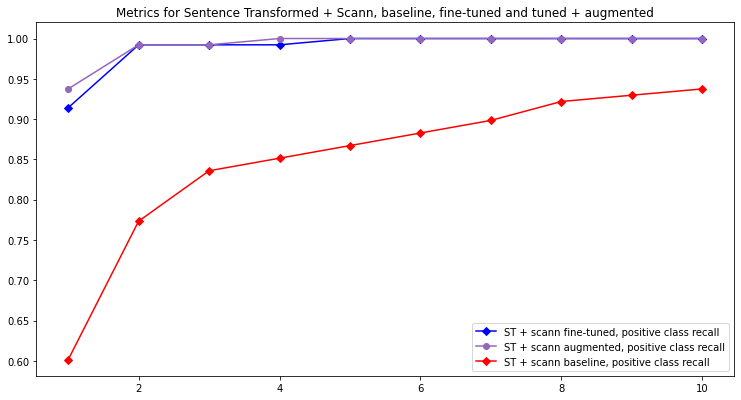

In [ ]:
import matplotlib.pyplot  as plt
import numpy as np


x = range(1, 11)


plt.plot(x, r_pos_tuned, '-bD',  label='ST + scann fine-tuned, positive class recall')
# plt.plot(x, r_neg_tuned, '-C0D',  label='ST fine-tuned, negative class recall')
# plt.plot(x, f1_tuned, '-C2D',  label='ST + scann fine-tuned, macro avg F1')

plt.plot(x, r_pos_aug, '-C4o',  label='ST + scann augmented, positive class recall')
# plt.plot(x, r_neg_aug, '-C6o',  label='ST augmented, negative class recall')
# plt.plot(x, f1_aug, '-mo',  label='ST + scann augmented, macro avg class F1')

plt.plot(x, r_pos_base, '-rD',  label='ST + scann baseline, positive class recall')

plt.legend()
plt.title('Metrics for Sentence Transformed + Scann, baseline, fine-tuned and tuned + augmented')
# plotting a line plot after changing it's width and height
fig = plt.gcf()
fig.set_size_inches(12.5, 6.5)
plt.show()

